<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from skyfield.api import load
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from skyfield.api import utc
from scipy.optimize import brentq # machine learning

from datetime import timedelta, datetime
import pytz

In [13]:
# how precise decimals are shown in table
pd.set_option('display.float_format', '{:.10f}'.format)

In [18]:
# import required functions
from definitions import *
from whereIsData import *
from hexbind import *

2018-10-20 13:00:00


16668

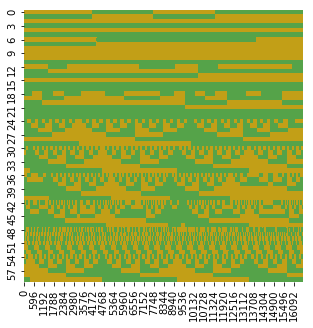

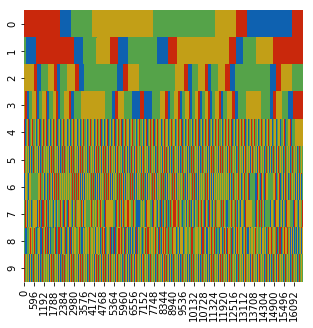

In [23]:
# get trading data
get_data = get_crypto_planet_data(1000000, mapping_type='element_ching_lines')
len(get_data)

In [24]:
get_data

,Close,0,1,2,3,4,5,6,7,8,...,8_3,8_4,8_5,8_6,9_1,9_2,9_3,9_4,9_5,9_6
date,,,,,,,,,,,,,,,,,,,,,
2018-10-20 13:00:00,6408.0400000000,0,1,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2018-10-20 14:00:00,6403.8300000000,0,1,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2018-10-20 15:00:00,6397.1500000000,0,1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2018-10-20 16:00:00,6399.8400000000,0,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2018-10-20 17:00:00,6394.8300000000,0,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2018-10-20 18:00:00,6394.0900000000,0,1,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2018-10-20 19:00:00,6399.1700000000,0,1,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2018-10-20 20:00:00,6403.9000000000,0,1,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2018-10-20 21:00:00,6403.0000000000,0,1,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
